## Dragon Real Estate Price Predictor

In [642]:
import pandas as pd

In [643]:
housing=pd.read_csv(r"C:\Users\bhavy\OneDrive\Documents\Real_Estate_MLProject\data.csv")

In [644]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DES,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.03,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.07,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [645]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DES      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [646]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [647]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DES,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613419,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601602,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.010000,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.080000,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.255000,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677500,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.980000,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [648]:
%matplotlib inline

In [649]:
import matplotlib.pyplot as plt

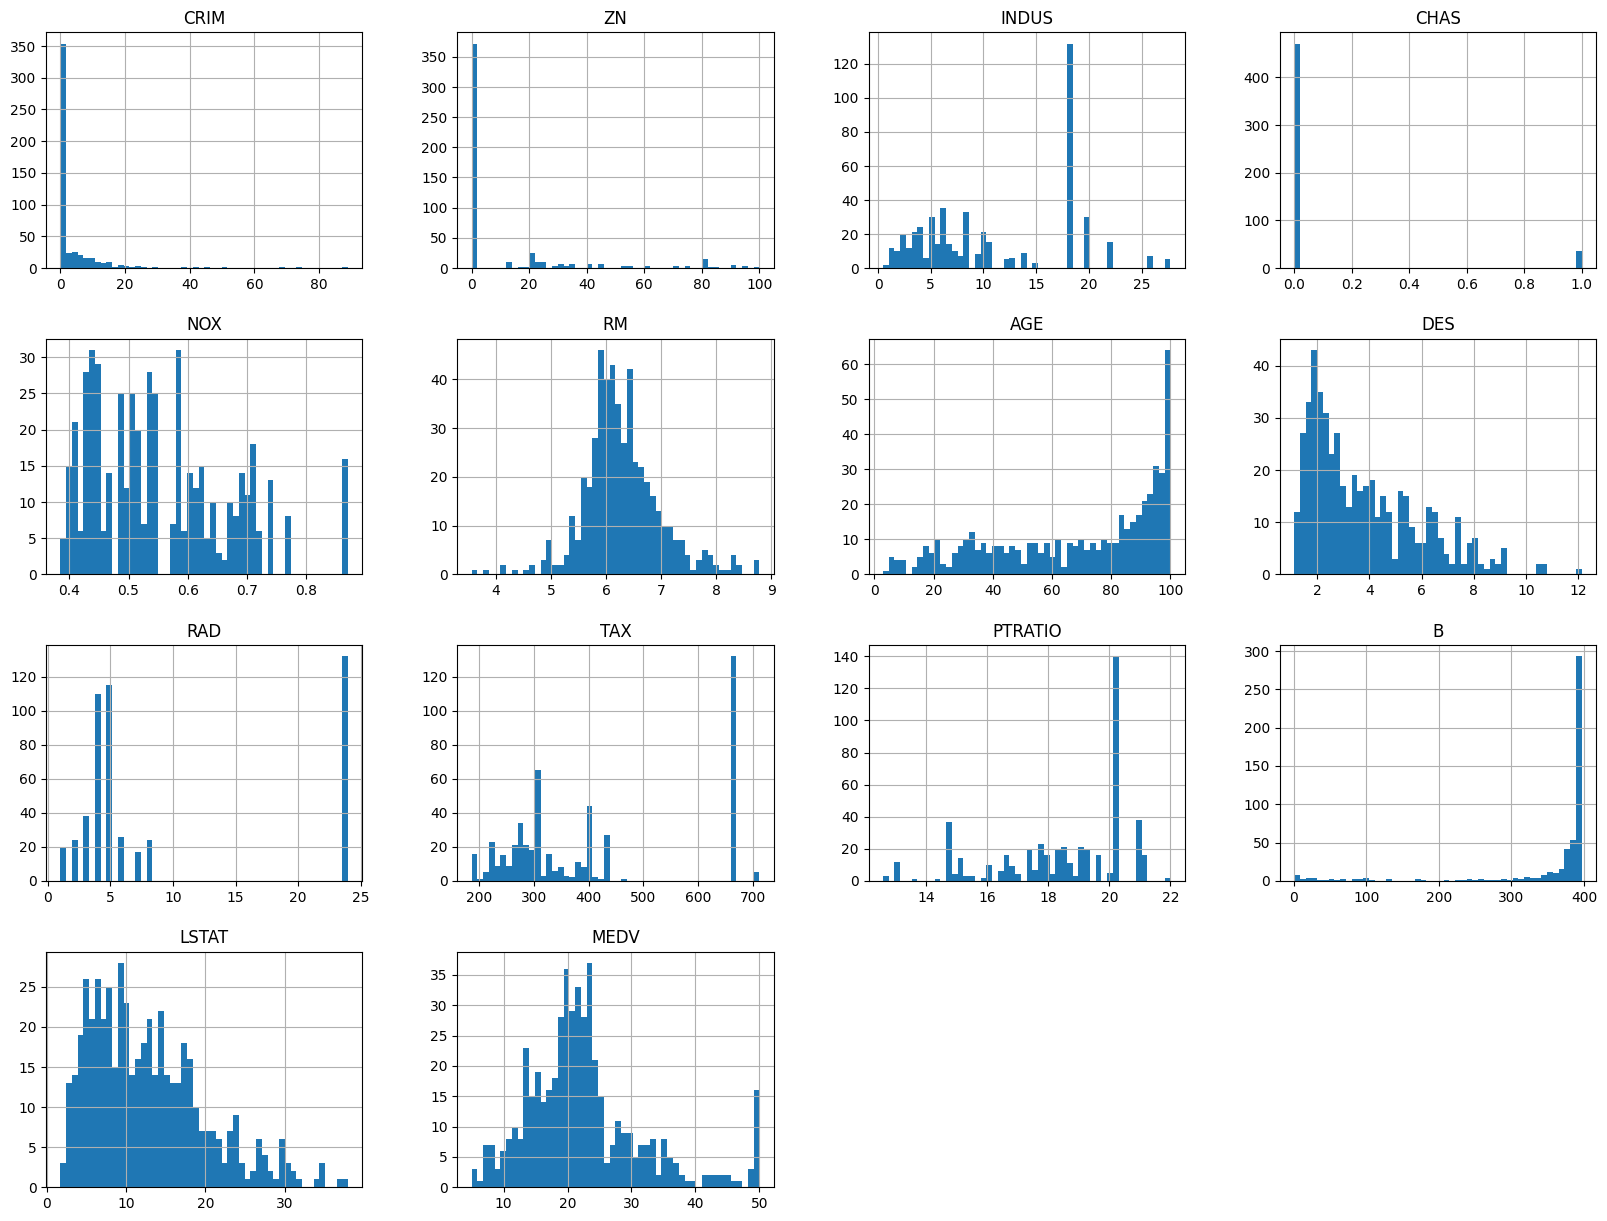

In [650]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

## Train-Test splitting

In [651]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [652]:
train_set,test_set=split_train_test(housing,0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [653]:
print("rows in train set :",len(train_set))
print("rows in test set :",len(test_set))

rows in train set : 405
rows in test set : 101


In [654]:
!pip install scikit-learn

In [655]:
import sklearn
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print("rows in train set :",len(train_set))
print("rows in test set :",len(test_set))
print(test_set['CHAS'].value_counts())
print(train_set['CHAS'].value_counts())
print(96/6,375/29)

rows in train set : 404
rows in test set : 102
CHAS
0    96
1     6
Name: count, dtype: int64
CHAS
0    375
1     29
Name: count, dtype: int64
16.0 12.931034482758621


In [656]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [657]:
print(strat_test_set['CHAS'].value_counts())
print(strat_train_set['CHAS'].value_counts())

CHAS
0    95
1     7
Name: count, dtype: int64
CHAS
0    376
1     28
Name: count, dtype: int64


In [658]:
95/7

13.571428571428571

In [659]:
376/28

13.428571428571429

In [660]:
housing=strat_train_set.copy()

## Looking for Correlations

In [661]:
corr_matrix=housing.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DES,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.212915,0.416633,-0.061464,0.430875,-0.257679,0.361864,-0.386903,0.648208,0.603921,0.305583,-0.486864,0.471442,-0.393693
ZN,-0.212915,1.000000,-0.542161,-0.023536,-0.509327,0.292252,-0.565680,0.666939,-0.306480,-0.322803,-0.390570,0.188575,-0.420097,0.339741
INDUS,0.416633,-0.542161,1.000000,0.043686,0.759051,-0.385324,0.644114,-0.708612,0.580908,0.716288,0.384465,-0.368685,0.611068,-0.473516
CHAS,-0.061464,-0.023536,0.043686,1.000000,0.077490,0.100385,0.058388,-0.088081,-0.023005,-0.048802,-0.132682,0.048275,-0.077592,0.205066
NOX,0.430875,-0.509327,0.759051,0.077490,1.000000,-0.300860,0.727358,-0.763623,0.596012,0.659049,0.164977,-0.408434,0.602386,-0.422873
RM,-0.257679,0.292252,-0.385324,0.100385,-0.300860,1.000000,-0.241318,0.204159,-0.200095,-0.282449,-0.331544,0.122472,-0.603006,0.680857
AGE,0.361864,-0.565680,0.644114,0.058388,0.727358,-0.241318,1.000000,-0.734827,0.449489,0.501491,0.259633,-0.287900,0.599211,-0.364596
DES,-0.386903,0.666939,-0.708612,-0.088081,-0.763623,0.204159,-0.734827,1.000000,-0.481556,-0.530840,-0.215173,0.309222,-0.501408,0.240451
RAD,0.648208,-0.306480,0.580908,-0.023005,0.596012,-0.200095,0.449489,-0.481556,1.000000,0.910932,0.471912,-0.490951,0.479857,-0.374693
TAX,0.603921,-0.322803,0.716288,-0.048802,0.659049,-0.282449,0.501491,-0.530840,0.910932,1.000000,0.473026,-0.475293,0.534228,-0.456657


In [662]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DES        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393693
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

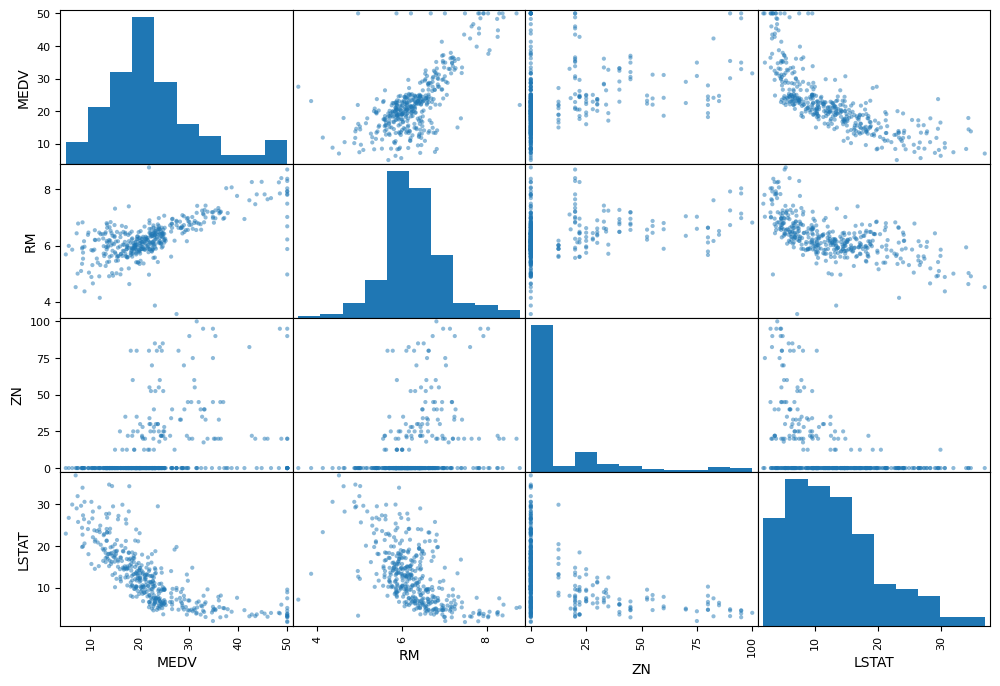

In [663]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

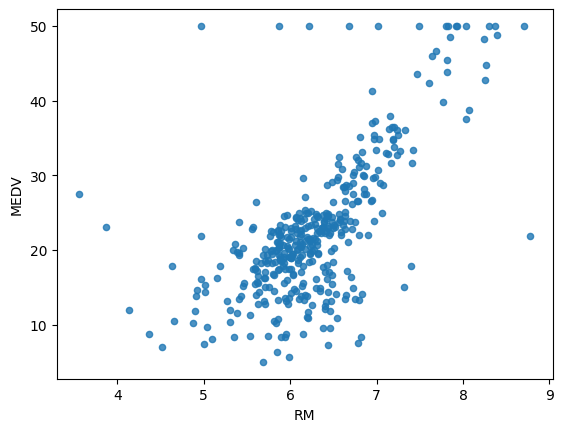

In [664]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

## Trying out Attribute Combinations

In [665]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]

In [666]:
housing["TAXRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [667]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DES,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.05,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.02,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [668]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DES        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393693
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

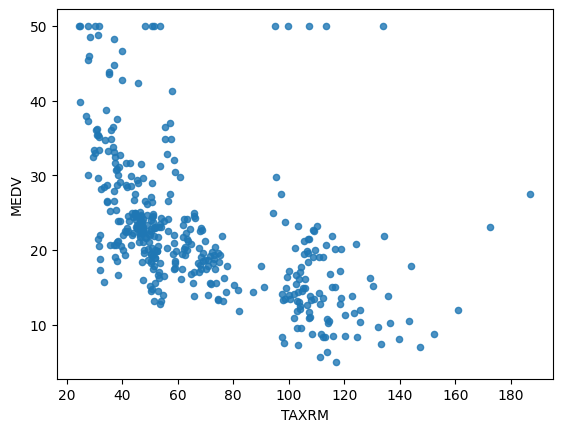

In [669]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [670]:
housing=strat_train_set.drop('MEDV',axis=1)
housing_labels=strat_train_set['MEDV'].copy()

## Missing Attributes

In [671]:
a=housing.dropna(subset=["RM"]) #1.dropping rows which contains null value
a.shape

(399, 13)

In [672]:
housing.drop("RM",axis=1).shape #2.dropping entire column
#original dataframe remains same

(404, 12)

In [673]:
housing.shape

(404, 13)

In [674]:
median=housing['RM'].median()
median

np.float64(6.209)

In [675]:
housing['RM'].fillna(median) #3.replacing missing values with median
#original dataframe remains same

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [676]:
housing.describe() #befor we start filling missing attributes using imputer

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DES,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602723,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099338,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.010000,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090000,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.285000,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.735000,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.530000,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [677]:
from sklearn.impute import SimpleImputer #4.deal missing value with strategy
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [678]:
imputer.statistics_ #calculates median of all columns

array([2.85000e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [679]:
imputer.statistics_.shape

(13,)

In [680]:
X=imputer.transform(housing)
housing_tr=pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()
# count of rm is 506 not 501 as before because imputer calculates the median(strategy) of the column and fill those missing places with it.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DES,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602723,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099338,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.010000,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090000,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.285000,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.735000,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.530000,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Creating Pipeline

In [681]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy='median')),
    ("std_scaler",StandardScaler()),
])

In [682]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [683]:
housing_num_tr

array([[-0.4391875 ,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.4428961 ,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15666078, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.4354789 , -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14182638, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.4391875 , -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [684]:
housing_num_tr_df = pd.DataFrame(housing_num_tr, columns=housing_tr.columns)
housing_num_tr_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DES,RAD,TAX,PTRATIO,B,LSTAT
0,-0.439187,3.126282,-1.121650,-0.272888,-1.422627,-0.239793,-1.312388,2.611114,-1.001686,-0.577819,-0.974918,0.411642,-0.860910
1,-0.442896,3.126282,-1.358938,-0.272888,-1.054257,0.500912,-1.393881,2.193123,-0.657667,-0.785579,-0.692779,0.391319,-0.941167
2,0.156661,-0.489831,0.983368,-0.272888,0.479194,0.288680,0.870210,-0.687307,1.635794,1.505715,0.811966,0.446243,0.814802
3,-0.423117,-0.489831,-0.577199,-0.272888,-0.557384,0.136884,-0.522259,0.378825,-0.542994,-0.744027,0.529827,0.453435,-0.819398
4,-0.408283,-0.489831,-0.577199,-0.272888,-0.557384,0.046932,-1.422226,0.796434,-0.542994,-0.744027,0.529827,0.453435,-0.919028
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.007754,-0.489831,1.198819,3.664502,2.680852,-0.177950,0.480460,-0.954329,-0.542994,-0.055452,-1.774314,-2.765837,0.308352
400,0.426152,-0.489831,0.983368,-0.272888,0.479194,-0.246821,0.569040,-0.822535,1.635794,1.505715,0.811966,-3.656820,1.452707
401,-0.435479,-0.489831,-1.230832,-0.272888,-0.968589,2.166445,-1.138772,-0.119730,-0.887013,-0.809323,-0.222546,0.418312,-1.276033
402,0.141826,-0.489831,0.983368,-0.272888,1.327303,0.346306,0.618644,-0.625059,1.635794,1.505715,0.811966,-3.152392,0.738696


## Selecting desired model for Dragon Real Estates

In [685]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)


RandomForestRegressor()

In [686]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[0:5]
prepared_data=my_pipeline.transform(some_data)

In [687]:
model.predict(prepared_data)

array([22.446, 25.461, 16.223, 23.463, 23.458])

In [688]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [689]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [690]:
rmse #error 0  means not the model is good it may overfits the data,it fits the noise also

np.float64(1.1678701058587013)

## Cross Validation-better evaluation technique

In [691]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [692]:
rmse_scores

array([2.77201317, 2.7530311 , 4.41589067, 2.56455151, 3.30680224,
       2.57568494, 4.82305674, 3.32375747, 3.2880161 , 3.19111034])

In [693]:
def print_scores(scores):
    print("scores:",scores)
    print("mean:",scores.mean())
    print("standard deviation:",scores.std())

In [694]:
print_scores(rmse_scores)

scores: [2.77201317 2.7530311  4.41589067 2.56455151 3.30680224 2.57568494
 4.82305674 3.32375747 3.2880161  3.19111034]
mean: 3.3013914286932846
standard deviation: 0.7225626317113497


## Saving the Model

In [695]:
from joblib import dump,load
dump(model,"DragonRealEstates.joblib")

['DragonRealEstates.joblib']

## Testing model on test data

In [696]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions)
print(list(Y_test))

[24.879 11.622 25.464 21.924 18.552 15.188 20.016 14.696 31.263 40.486
 19.792 11.657 24.13  28.75  19.6   10.501 32.07  14.487 23.589 19.103
 19.802 18.054 17.65  22.116 17.935 30.689 16.164 32.802  8.796 33.415
 23.613 21.227 22.819 10.898 20.884 11.201 42.371 24.337 22.968 41.645
 24.143 29.675 20.535 20.981 19.476 33.819 44.455 20.197 20.354 21.634
 21.291 14.633 21.339 15.101 24.855 32.808 43.004 28.48  19.324 21.066
 47.348  9.968 18.798 24.208 15.135 32.725 19.423 17.991 19.165 34.351
 27.072 22.783 21.461 22.193 34.79  12.896 15.845 20.19  20.829 21.513
 22.129 21.562 14.501 22.741 20.768 21.008 14.023 21.239 21.386 23.54
 19.152 27.431  7.109 26.126 18.699 29.92  19.733 31.089 14.612 26.242
 21.072 20.439]
[16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [697]:
final_rmse

np.float64(2.931406495049037)

In [698]:
prepared_data[0]

array([-0.4391875 ,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the Model

In [699]:
from joblib import dump,load
import numpy as np
model=load("DragonRealEstates.joblib")
features=np.array([[-1.4391875 ,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.603])